# Homework: Goals & Approaches

> The body grows stronger under stress. The mind does not.
> 
>  -- Magic the Gathering, _Fractured Sanity_

This homework deals with the goals you must define, along with the approaches you deem necessary to achieve those goals. 
Key to this will be a focus on your _workflows_: 

- are they reproducible? 
- are they maintainable? 
- are they well-justified and communicated? 

This is not a "machine-learning" course, but machine learning plays a large part in modern text analysis and NLP. 
Machine learning, in-turn, has a number of issues tracking and solving issues in a collaborative, asynchronous, distributed manner. 

It's not inherently _wrong_ to use pre-configured models and libraries! 
In fact, you will likely be unable to create a set of ML algorithms that "beat" something others have spent 100's of hours creating, optimizing, and validating. 
However, to answer the three questions above, we need a way to explicitly track our decisions to use others' work, and efficiently _swap out_ that work for new ideas and directions as the need arises. 

This homework is a "part 1" of sorts, where you will construct several inter-related pipelines in a way that will allow _much easier_ adjustment, experimentation, and measurement in "part 2"

## Setup

### Dependencies 
As before, ensure you have an up-to-date environment to isolate your work. 
Use the `environment.yml` file in the project root to create/update the `text-data-class` environment. 
> I expect any additional dependencies to be added here, which will show up on your pull-request. 

### Data
Once again, we have set things up to use DVC to import our data. 
If the data changes, things will automatically update! 
The data for this homework has been imported as `mtg.feather` under the `data/` directory at the top-level of this repository. 
In order to ensure your local copy of the repo has the actual data (instead of just the `mtg.feather.dvc` stub-file), you need to run `dvc pull`

In [1]:
!dvc pull

Everything is up to date.                                                       
ERROR: failed to pull data from the cloud - Failed to clone repo 'https://github.com/TLP-COI/text-data-course' to '/var/folders/f3/gjf34dmn6zjg5nymq8k6lq6h0000gn/T/tmp5lxt5h0qdvc-clone'


Then you may load the data into your notebooks and scripts e.g. using pandas+pyarrow:

In [1]:
import pandas as pd
(pd.read_feather('../../../data/mtg.feather')# <-- will need to change for your notebook location
 .head()[['name','text', 'mana_cost', 'flavor_text','release_date', 'edhrec_rank']]  
)

,name,text,mana_cost,flavor_text,release_date,edhrec_rank
0,Ancestor's Chosen,First strike (This creature deals combat damag...,"[5, W, W]",<NA>,2007-07-13,16916.0
1,Angel of Mercy,Flying When Angel of Mercy enters the battlefi...,"[4, W]",Every tear shed is a drop of immortality.,2007-07-13,14430.0
2,Aven Cloudchaser,Flying (This creature can't be blocked except ...,"[3, W]",<NA>,2007-07-13,13098.0
3,Ballista Squad,"{X}{W}, {T}: Ballista Squad deals X damage to ...","[3, W]",The perfect antidote for a tightly packed form...,2007-07-13,14972.0
4,Bandage,Prevent the next 1 damage that would be dealt ...,[W],"Life is measured in inches. To a healer, every...",2007-07-13,4980.0


But that's not all --- at the end of this homework, we will be able to run a `dvc repro` command and all of our main models and results will be made available for your _notebook_ to open and display.

### Submission Structure
You will need to submit a pull-request on DagsHub with the following additions: 

- your subfolder, e.g. named with your user id, inside the `homework/hw2-goals-approaches/` folder
    - your "lab notebook", as an **`.ipynb` or `.md`** (e.g. jupytext), that will be exported to PDF for Canvas submission. **This communicates your _goals_**, along with the results that will be compared to them. 
    - your **`dvc.yaml`** file that will define  the inputs and outputs of your _approaches_. See [the DVC documentation](https://dvc.org/doc/user-guide/project-structure/pipelines-files) for information!
    - **source code** and **scripts** that define the preprocessing and prediction `Pipeline`'s you wish to create. You may then _print_ the content of those scripts at the end of your notebook e.g. as appendices using 
- any updates to `environment.yml` to add the dependencies you want to use for this homework

## Part 1: Unsupervised Exploration

Investigate the [BERTopic](https://maartengr.github.io/BERTopic/index.html) documentation (linked), and train a model using their library to create a topic model of the `flavor_text` data in the dataset above. 

- In a `topic_model.py`, load the data and train a bertopic model. You will `save` the model in that script as a new trained model object
- add a "topic-model" stage to your `dvc.yaml` that has `mtg.feather` and `topic_model.py` as dependencies, and your trained model as an output
- load the trained bertopic model into your notebook and display
    1. the `topic_visualization` interactive plot [see docs](https://maartengr.github.io/BERTopic/api/plotting/topics.html)
    2. Use the plot to come up with working "names" for each major topic, adjusting the _number_ of topics as necessary to make things more useful. 
    3. Once you have names, create a _Dynamic Topic Model_ by following [their documentation](https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html). Use the `release_date` column as timestamps. 
    4. Describe what you see, and any possible issues with the topic models BERTopic has created. **This is the hardest part... interpreting!**

In [2]:
from bertopic import BERTopic

# load the trained model and display 
topic_model = BERTopic.load("my_model")

In [3]:
# load data
mtg = pd.read_feather('../../../data/mtg.feather')

In [4]:
# pull out flavor text
flavor_text = list(mtg["flavor_text"].values.dropna())

In [5]:
# load topic model variables
topics, probs = topic_model.fit_transform(flavor_text)

Batches: 100%|██████████| 927/927 [08:52<00:00,  1.74it/s]


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [6]:
# visualize the top words of each topic
topic_model.visualize_barchart()

The above shows the top words in several of the topics. A lot of the words are tough to really interpret without the subject matter expertise (I have no idea what phyrexia is) and it seems like it could benefit from some additional stemming. These words are also super sepcific and so it gives us a clue that the generic embeddings from the BERT model might have some trouble.

In [7]:
# this heatmap shows the level of similiraity between topics
topic_model.visualize_heatmap()

The above heatmap gives us an idea about the similarity between topics

In [8]:
topic_model.visualize_topics([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

We see here 3 main groupings here

In [9]:
# hierarchical clustering
topic_model.visualize_hierarchy()

We can use hierarchical clustering to visualize the relationships

#### What are some working names for each of the topics

As someone who knows next to nothing about the game it was very hard for me to decipher. Seems like topic modeling not working super well here maybe? Because of word embeddings probably. Tried to do it by grouping rather than indiviudal topics. Having lots of proper nouns really throws it off


Bottom left- treatusre/pirates- lots of proper names

Center right- emptire war battle

Top right grouping- maybe magic/nature/gods?

These topics aren't very good to be honest. 

In [10]:
dynamic = mtg[['release_date', 'flavor_text']].dropna()

# convert release date to list
release_date = list(dynamic['release_date'])
text = list(dynamic['flavor_text'])

In [11]:
# create a dynamic topic model using release date columns as timestamps
topics_over_time = topic_model.topics_over_time(text, topics, release_date)

281it [00:52,  5.39it/s]


In [12]:
topics_over_time

,Topic,Words,Frequency,Timestamp
0,-1,"oi, oi oi, land, wall, battle",47,1993-08-05
1,1,"rocks, king, goblins, wary drop, king foolish",3,1993-08-05
2,2,"study acquires, acquires taste, occasionally m...",1,1993-08-05
3,3,"ironclaw, orcs, depraved ignoble, display inge...",2,1993-08-05
4,6,"spirits air, wings, air, spirits, mischief mayhem",3,1993-08-05
...,...,...,...,...
2334,15,"thraben, thalia guardian, guardian thraben, th...",4,2022-01-28
2335,16,"grounds, mapping safe, province mapping, safe ...",1,2022-01-28
2336,18,"smell, despair remained, remained drifting, em...",2,2022-01-28
2337,-1,"known hit, camera, volunteers divided, wait po...",3,2022-04-01


In [13]:
topic_model.visualize_topics_over_time(topics_over_time, topics = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

This isn't very helpful because everything goes up over time.

In [14]:
# what if we normalize frequency 
topic_model.visualize_topics_over_time(topics_over_time, topics = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], \
                                     normalize_frequency=True)

This is a little more helpful. We can see that lots of topics have significant spikes in different years, perhaps suggesting some themes for the cards in different years

In [16]:
# what if wetry to normalize manually
# filter out topics -1 and 0
topics_over_time = topics_over_time[topics_over_time['Topic'] != -1 | 0]

In [17]:
# normalze frequency by timestamp
topics_over_time.Frequency = topics_over_time.groupby('Timestamp')['Frequency'].transform(lambda x: x/x.sum())

In [18]:
# manual normalized
topic_model.visualize_topics_over_time(topics_over_time, topics = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

Normalizing manually tells us something similar but the spikes are much more pronounced- not exactly sure what the difference is and how the normalization function works in BERTopic, the documentation isn't super clear. 

## Part 2 Supervised Classification

Using only the `text` and `flavor_text` data, predict the color identity of cards: 

Follow the sklearn documentation covered in class on text data and [Pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators) to create a classifier that predicts which of the colors a card is identified as. 
You will need to preprocess the target _`color_identity`_ labels depending on the task: 

- Source code for pipelines
    - in `multiclass.py`, again load data and train a Pipeline that preprocesses the data and trains a multiclass classifier (`LinearSVC`), and saves the model pickel output once trained. target labels with more than one color should be _unlabeled_! 
    - in `multilabel.py`, do the same, but with a multilabel model (e.g. [here](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multilabel.html#sphx-glr-auto-examples-miscellaneous-plot-multilabel-py)). You should now use the original `color_identity` data as-is, with special attention to the multi-color cards. 
- in `dvc.yaml`, add these as stages to take the data and scripts as input, with the trained/saved models as output. 

- in your notebook: 
    - Describe:  preprocessing steps (the tokenization done, the ngram_range, etc.), and why. 
    - load both models and plot the _confusion matrix_ for each model ([see here for the multilabel-specific version](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html))
    - Describe: what are the models succeeding at? Where are they struggling? How do you propose addressing these weaknesses next time?

In [20]:
# plot confusion matrixes
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [21]:
# import models
import pickle
file = open("mtg_classifier_multilabel.pkl",'rb')
ml_classifier = pickle.load(file)
file.close()

In [22]:
import pickle
file = open("mtg_classifier.pkl",'rb')
mc_classifier = pickle.load(file)
file.close()

### Preprocessing Steps For Multiclass: 
Feature Selection:
- Feature selection is displayed below. To create the target variable any card with multiple assocaited colors was dropped and the letter color code was mapped to its equivalent actual color. 
- NA variables were dropped
- The X variable was created by concatenating the text and flabor text category to make a single docuemnt for each card. 

Modeling:
- Features were split into a test/training split with 80% of the dataframe used to train the model and the remaining 20$ used as a test set.
- Selected features were passed through a modeling pipeline that vectorized the text, created a tfidf dataframe and then passed through a SVC classifier which can natively handle multiclass problems. 
- A min_df of 3 and max_df of 0.8 was used in an effort to keep only important variables. And an ngram range of (1,2) was used to try to capture important word combinations

In [23]:
# relevant data
# read the data
supervised_df = pd.read_feather('../../../data/mtg.feather')[["flavor_text", "text", "color_identity"]]

# mapping
color_mapping = {"['W']": 'tan', "['U']": 'blue', "['B']": 'purple', "['R']": 'red', "['G']": 'green', "['M']": 'goldenrod'}
supervised_df['color_identity'] = supervised_df['color_identity'].astype(str).map(color_mapping)

# dropna
supervised_df.dropna(inplace=True)

# join the text together
text = supervised_df.text.str.cat(supervised_df.flavor_text, sep='\n')

In [24]:
# train test split
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(text, supervised_df["color_identity"], test_size=0.2, random_state=42)

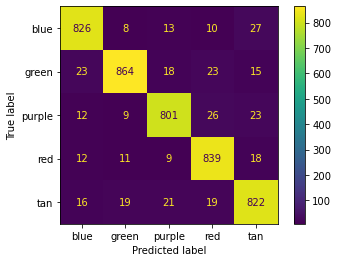

In [25]:
# plot multiclass confusion matrix
ConfusionMatrixDisplay.from_estimator(mc_classifier, X_test_mc, y_test_mc)
plt.show()

Based on the confusion matrix it seems that the model is performing surprisingly well. It's able to correctly classify the vast majority of the text and upon initial inspection seems to be pretty balanced between prescision and recall (which will be confirmed by the high f1 score later in this notebook). 

This can perhaps be improved by tweaking the modeling paramters slightly, but it seems like our chosen features are highly predictive.

### Preprocessing Steps for Multilabel
Preprocessing for multilabel was similar to multiclass with a few important differences. We selected our variables the same way, but cards with multiple colors were not dropped. Rather the y was passed through a multi label binarizer so that it could be used for multilabel classification. The SVC classifier was wrapped with sklearn's Multi Output Classifier function in order to out multilabel predictions. 

In [26]:
# multilabel confusion matrix
from sklearn.preprocessing import MultiLabelBinarizer

supervised_df = pd.read_feather('../../../data/mtg.feather')[["flavor_text", "text", "color_identity"]]
supervised_df.dropna(inplace=True)

y = MultiLabelBinarizer().fit_transform(supervised_df.color_identity)

text = supervised_df.text.str.cat(supervised_df.flavor_text, sep='\n')


In [27]:
text.dropna(inplace=True)

In [28]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=42)

In [29]:
# multilabel confusion matrix plot
ml_matrix = multilabel_confusion_matrix(y_test, ml_classifier.predict(X_test))
ml_matrix

array([[[4621,   59],
        [ 146, 1101]],

       [[4554,   51],
        [ 156, 1166]],

       [[4577,   73],
        [ 156, 1121]],

       [[4652,   69],
        [ 130, 1076]],

       [[4497,   87],
        [ 167, 1176]]])

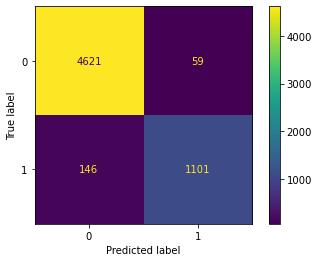

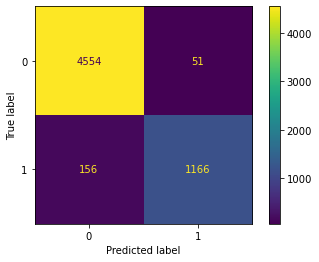

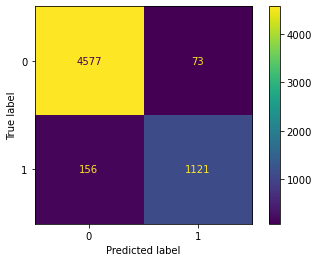

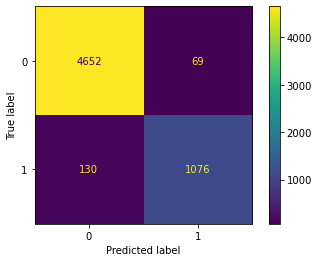

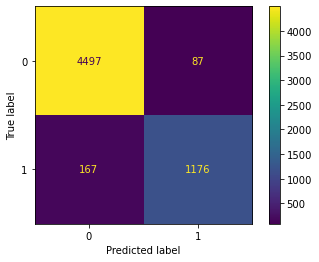

In [30]:
for i in range(len(ml_matrix)):
    ConfusionMatrixDisplay(ml_matrix[i]).plot()

The above confusoin matrices imply that the multilabel model performs relatively well. It could perhaps be improved by using a different kind of multilabel classifier. 

## Part 3: Regression?

> Can we predict the EDHREC "rank" of the card using the data we have available? 

- Like above, add a script and dvc stage to create and train your model
- in the notebook, aside from your descriptions, plot the `predicted` vs. `actual` rank, with a 45-deg line showing what "perfect prediction" should look like. 
- This is a freeform part, so think about the big picture and keep track of your decisions: 
    - what model did you choose? Why? 
    - What data did you use from the original dataset? How did you proprocess it? 
    - Can we see the importance of those features? e.g. logistic weights? 
    
How did you do? What would you like to try if you had more time?

In [31]:
# plot predicted vs actual
import matplotlib.pyplot as plt
file = open("regression.pkl",'rb')
clf = pickle.load(file)
file.close()

In [32]:
# read the regression data
regression_df = pd.read_csv("regression_df.csv")

# target and features w/o text
y = regression_df.edhrec_rank 
X = regression_df.drop(['edhrec_rank'], axis=1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
clf.predict(X_test)

array([12460.84023782,  6293.86566392,  8084.07139095, ...,
       11636.15329018, 11897.60287464,  8366.42329473])

In [34]:
y_test

11852    10300.0
38443     1376.0
43163    10329.0
37546     9437.0
16158     5008.0
          ...   
29924     7362.0
34873     3199.0
22216     8212.0
8304     11450.0
9792       433.0
Name: edhrec_rank, Length: 9681, dtype: float64

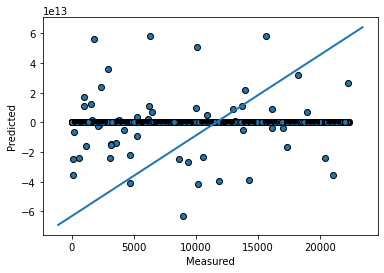

In [35]:
#predict the test set
fig, ax = plt.subplots()
ax.scatter(y_test, clf.predict(X_test), edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
ax. plot(ax. get_xlim(), ax. get_ylim(),lw=2)
plt.show()

This is garbage. Overall it seems like with the given features the model is completely unable to predict rank. 

#### What regression model did I choose?
I chosea to use a linear regression model because it's the most clearly interpretable and also simple to implement. It would perhaps be useufl to try a regression with a more complex functional form, but there's no clear shape to the data. Perhaps a regression with a loss function- like lasso- would be better

The importantce of each can be interpreted through coeffecients- but that doesn't mean anythign here given that the model couldn't predict rank at all. 

#### What data did I use and how did I process it? 

The first cut was simply  based just off what sounded like ti would be important. Anything that seemed like an identiier but not useful I cut out. 

After inspecting the remaining data I found lots of NAs in power, toughness, and life so I got rid of those.
I thought we could make categoires for supertypes and subtypes but there were so many that it didn't really amke sense to do so I then got rid of those.
I then rarity into a bynch of dummies as well as blocks and types (33 possible). There were 32 possible color combos so made them dummies too (clealry this releied on lots of dummies).

Finally, I combined flavor text and text into one column, vectorized, made a tfidf dtm and appended that to the dataframe 

## Part 4: Iteration, Measurement, & Validation 

> No model is perfect, and experimentation is key. How can we more easily iterate and validate our model? 

- Pick **ONE** of your models above (regression, multilabel, or multiclass) that you want to improve or investigate, and calculate metrics of interest for them to go beyond our confusion matrix/predicted-actual plots: 
    - for multiclass, report average and F1
    - for multilabel, report an [appropriate metric](https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics) (e.g. `ranking_loss`)
    - for regression, report an [appropriate metric](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) (e.g. 'MAPE' or MSE), **OR** since these are *ranks*, the [pearson correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) between predicted and actual may be more appropriate?
- in the corresponding `dvc.yaml` stage for your model-of-interest, add `params` and `metrics`
    - under `params`, pick a setting in your preprocessing (e.g. the `TfidfVecorizer`) that you want to change to imrpove your results. Set that param to your current setting, and have your model read from a `params.yaml` rather than directly writing it in your code. [^1]
    - under `metrics`, reference your `metrics.json` and have your code _write_ the results as json to that file, rather than simply printing them or reporting them in the notebook. 
- commit your changes to your branch, run `dvc repro dvc.yaml` for your file, then run a _new experiment_ that changes that one parameter: e.g. `dvc exp run -S preprocessing.ngrams.largest=1` (see the `example/` folder for a complete working example). 

Report the improvement/reduction in performance with the parameter change for your metric, whether by copy-pasting or using `!dvc exp diff` in the notebook, the results of `dvc exp diff`. 
    
[^1]: in production or bigger projects, consider using [`hydra`](https://hydra.cc/), [`driconfig`](https://dribia.github.io/driconfig/), or others like them to help manage .yaml and .toml settings files even better. 

In [36]:
import json
# Opening JSON file
f = open('metrics.json')

# show metrics
json.load(f)

{'blue': 0.9317540891,
 'green': 0.932038835,
 'purple': 0.9244085401,
 'red': 0.9291251384,
 'tan': 0.9123196448,
 'accuracy': 0.9259589652,
 'macro avg': 0.9259292495,
 'weighted avg': 0.9259781543}

Pretty balanced all around

In [49]:
!dvc exp diff 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Path          Metric        HEAD     workspace    Change
metrics.json  accuracy      0.92596  0.90143      -0.024532
metrics.json  blue          0.93175  0.9099       -0.021849
metrics.json  green         0.93204  0.89914      -0.032897
metrics.json  macro avg     0.92593  0.90147      -0.024462
metrics.json  purple        0.92441  0.90323      -0.021183
metrics.json  red           0.92913  0.90655      -0.022578
metrics.json  tan           0.91232  0.88852      -0.023802
metrics.json  weighted avg  0.92598  0.9014       -0.024578



Path          Metric        HEAD      workspace    Change

metrics.json  accuracy      0.27163   0.92596      0.65433

metrics.json  blue          0.30292   0.93175      0.62883

metrics.json  green         0.035088  0.93204      0.89695

metrics.json  macro avg     0.24521   0.92593      0.68072

metrics.json  purple        0.29623   0.92441      0.62818

metrics.json  red           0.35176   0.92913      0.57737

metrics.json  tan           0.24005   0.91232      0.67227

metrics.json  weighted avg  0.2424    0.92598      0.68358

Path         Param                          HEAD    workspace    Change

params.yaml  preprocessing.ngrams.largest   -       1            diff not supported

params.yaml  preprocessing.ngrams.smallest  -       1            diff not supported

## Appendices

In [39]:
!cat topic_model.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
# load packages
import pandas as pd
from bertopic import BERTopic

# load the data
mtg = list(pd.read_feather('../../../data/mtg.feather')["flavor_text"].values.dropna())

# accoridng to their githb you dont' really need to lowercase the text etc many of the regular preprocessing techniques
# Link: 

# setting the number of topic to auto automatically reduces topic using  hdbscan
# using 2 ngrams
# granted there are more names
# I alos tested using ngrams(1,2) but that came out terrible
# setting the number of topic to auto automatically reduces topic using  hdbscan
topic_model = BERTopic(nr_topics="auto", verbose=True, n_gram_range=(2,2))
topics, probs = topic_model.

In [44]:
!cat multilabel.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
import pandas as pd
from sklearn.pipeline import Pipeline
#import sklearn linearsvc classifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer


mtg = pd.read_feather('../../../data/mtg.feather')[["flavor_text", "text", "color_identity"]]
mtg.dropna(inplace=True)

# strip brackets from color_identity 
#mtg["color_identity"] = mtg["color_identity"].astype(str).str.replace("[", "").str.replace("]", "

In [45]:
!cat multiclass.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import yaml 

with open("params.yaml", "r") as fd:
    params = yaml.safe_load(fd)

ngrams = params["preprocessing"]["ngrams"]

# read the data
mtg = pd.read_feather('../../../data/mtg.feather')[["flavor_text", "text", "color_identity"]]

# mapping
color_mapping = {"['W']": 'tan', "['U']": 'blue', "['B']": 'purple', "['R']": 'red', "['G']": 'green', "['M']": 'goldenrod'}
mtg['color_identity'] = mtg['color_identity'].a

In [46]:
!cat regression.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

# import packages
import pandas as pd
from sklearn.linear_model import LinearRegression
import re
from sklearn.model_selection import train_test_split
import pickle  
from sklearn.feature_extraction.text import TfidfVectorizer

# first selection based just off what sounds importnat
mtg = pd.read_feather('../../../data/mtg.feather')[['edhrec_rank', 'color_identity', 'converted_mana_cost', 'power', 'toughness', 'rarity', 'subtypes', \
'supertypes', 'types', 'text', 'flavor_text', 'life', 'block']]

# what columns do we have
mtg.columns

# how many na's do we have
mtg.isna().sum()

# lots of nas in power, toughness, and life

# drop power, toughness, and life
mtg.drop([